## Imports:

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Load two different grayscale images:

In [2]:
def Load(image1, image2):
    img1 = cv2.imread(image1, 0) 
    img2 = cv2.imread(image2, 0)
    return img1, img2

## Resize images:

In [3]:
def Resize(img1, img2, image1_path, image2_path):
    # set a new width and height in pixels
    new_width = 1500
    new_height = 1500

    # size
    size = (new_width, new_height)

    # resize image
    output_size_change_img1 = cv2.resize(img1, size, interpolation = cv2.INTER_AREA)
    output_size_change_img2 = cv2.resize(img2, size, interpolation = cv2.INTER_AREA)
    
    new_name_change = 'After_Changed_Size_'
    
    image1_new_name = new_name_change + image1_path
    image2_new_name = new_name_change + image2_path

    img1_size_after = cv2.imwrite(image1_new_name, output_size_change_img1)
    img1_changed_size = cv2.imread(image1_new_name, 0)

    img2_size_after = cv2.imwrite(image2_new_name, output_size_change_img2)
    img2_changed_size = cv2.imread(image2_new_name, 0)
    return img1_changed_size, img2_changed_size

## Transform to frequency domain using Fourier:

In [4]:
def FourierTransform(img1_changed_size, img2_changed_size):
    img1_fft = np.fft.fftshift(np.fft.fft2(img1_changed_size))
    img2_fft = np.fft.fftshift(np.fft.fft2(img2_changed_size))
    return img1_fft, img2_fft

## Separate Magnitude and phase of images:

In [5]:
def SeparateMagnitudephase(img1_fft, img2_fft):
    img1_amplitude = np.sqrt(np.real(img1_fft) ** 2 + np.imag(img1_fft) ** 2)
    img1_phase = np.arctan2(np.imag(img1_fft), np.real(img1_fft))
    img2_amplitude = np.sqrt(np.real(img2_fft) ** 2 + np.imag(img2_fft) ** 2)
    img2_phase = np.arctan2(np.imag(img2_fft), np.real(img2_fft))
    return img1_amplitude, img1_phase, img2_amplitude, img2_phase

## Get image (Image Reconstruction) by computing --> [amplitude * exp(j * phase)]:

In [6]:
def  combination(img_amplitude, img_phase):
    # amplitude_phase
    combination = np.multiply(img_amplitude, np.exp(1j * img_phase))
    combination_real = np.real(np.fft.ifft2(combination))  # drop imagniary as they are around 1e-14
    return combination_real

## Plot The Image Reconstruction

In [7]:
def PlotImage(Reconstructed_Image):
    # combined image has values < 0 and > 1, needs to be scaled.
    plt.figure(figsize=(5, 5))
    image = plt.imshow(np.abs(Reconstructed_Image), cmap='gray')
    return image

## Main Function(connection the functions together):

In [8]:
def Main(img1, img2, status):
    combined_image = 0
    image1, image2 = Load(img1, img2)
    image1_Resized, image2_Resized = Resize(image1, image2, img1, img2)
    image1_Resized_fft, image2_Resized_fft = FourierTransform(image1_Resized, image2_Resized)
    img1_amplitude, img1_phase, img2_amplitude, img2_phase = SeparateMagnitudephase(image1_Resized_fft, image2_Resized_fft)
    
    if status == 0 :  # Amplitude from image 1 and Phase from image 2
        combined_image = combination(img1_amplitude, img2_phase)
        
    if status == 1 :  # Amplitude from image 2 and Phase from image 1
        combined_image = combination(img2_amplitude, img1_phase)
        
    plotted_image = PlotImage(combined_image)
    
    return plotted_image

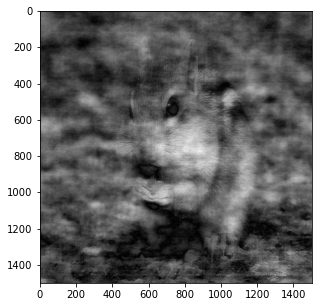

In [9]:
img1 = 'flower.jpg'
img2 = 'squirrel.jpg'
status = 0
photo = Main(img1, img2, status)
photo

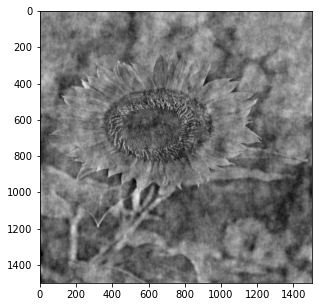

In [10]:
img1 = 'flower.jpg'
img2 = 'squirrel.jpg'
status = 1 
photo = Main(img1, img2, status)
photo